# <center>Problem Solving 03</center>
---


_Beka Modebadze 2019_ - https://github.com/bexxmodd/econ-papers-reproduction

## Replication of a paper published by Paul Glewwe, Albert Park, Meng Zhao - "A better vision for development: Eyeglasses and academic performance in rural primary schools in China"

> #### Original paper, published by **_Journal of Development Economics_** in 2016, you can download from [here](https://drive.google.com/file/d/1lqynUCYl8m6TyYAXmlUjRgL0qSzVNRk8/view?usp=sharing) and dataset can be downloaded from [here](https://drive.google.com/file/d/1vxRU9Epk-qCNHzeBBnmhGm2feu4GsEKB/view?usp=sharing)

_______________________
_Abstract: About 10% of primary school students in developing countries have poor vision, but very few of them wear
glasses. Almost no research examines the impact of poor vision on school performance, and simple OLS estimates
could be biased because studying harder may adversely affects one's vision. This paper presents results from a
randomized trial in Western China that offered free eyeglasses to rural primary school students. Our preferred
estimates, which exclude township pairs for which students in the control township were mistakenly provided
eyeglasses, indicate that wearing eyeglasses for one academic year increased the average test scores of students
with poor vision by 0.16 to 0.22 standard deviations, equivalent to 0.3 to 0.5 additional years of schooling. These
estimates are averages across the two counties where the intervention was conducted. We also find that the
benefits are greater for under-performing students. A simple cost-benefit analysis suggests very high economic
returns to wearing eyeglasses, raising the question of why such investments are not made by most families.
Wefind that girls aremore likely to refuse free eyeglasses, and that parental lack of awareness of vision problems,
mothers' education, and economic factors (expenditures per capita and price) significantly affect whether children
wear eyeglasses in the absence of the intervention._

--------- 
#### In this assignment, we'll work on a paper that analyzes the educational effect of providing eyeglasses to students in China in an experimental setting. We discuss the second part of the paper that analyzes students’ choices over accepting eyeglasses (Part 8 and table 8).
In the experiment, students’ visual acuity is measured by optometrists and if it is less than a certain number, they are offered free eyeglasses. Students who are offered free eyeglasses have the option to accept the offer or reject it. The variable of interest is whether the students who are offered eyeglasses are actually wearing glasses.
There is also a binary variable that shows whether the student is eligible for receiving eyeglasses. Eligibility and offer may not be perfectly aligned. (Read the reasons in the paper). The potential variables that may be used as explanatory variables, as well as variables for defining dependent variables are listed in the table below. 

* The main questions the paper asks in part 8 is:
    * If the benefits are so large, why do some children not wear eyeglasses?
    * Is the cost of glasses too high, especially for the poor, who may be credit-constrained?
    * Do parents know of their children’s vision problems of believing that glasses will weaken their children’s eyes or that poor vision has little effect of learning at a young age?

* The variable of interest is:
    * If students accept glasses or not.
    * It is a binary variable (Yes, they do, or No, they don’t)
        * We'll use dummy variable which has Base - Not wearing; 1 is wearing
    -----------

## Part 1: 
The variables and their description is as follows:

*Variable*	| Definition
--- | :---
**countycode  towncode schoolcode idcode**	| Codes for county, township, school, and student
**grade**	| Student’s grade (1 to 5)
**female** |	=1 for female, =0 for male
**birthdate; examdate**	| Student’s birth date and exam date
**lefteye; righteye**	| Student’s eye exam results for left and right eye. A measure between 4 and 5.2, with 4 unable to read any line (out of 12 lines) in the board and 5.2 being able to read all the lines
**height; weight**	| Student’s height  (centimeters) and weight (kilograms)
**headeduc; headocc**	| Household head’s education (codes 1-8) and occupation (1-8); Education (=years): 1=16y; 2=14; 3,4,5=12y; 6=9y; 7=6y; 8=0y; Occupation: 1=farmer; 2=worker; 3=teacher; 6=village leader, 4,5,7,8=others.
**glasses** |	=1 if the student had glasses before project started 2= if not
**received**	| =1 if the student received glasses in project 0= otherwise
**eligible**	| =1 if the student was considered as eligible to receive glasses =0 otherwise
**offer**	| =1 if the student was offered glasses in the project =0 otherwise
**chinese04s2 math04s2 science04s2**	| Test scores in Chinese, math, and science in 2004 (before the project started)
**townincpc**	| Township income per capita


In [1]:
# importing the dataset
import numpy as np
import pandas as pd

df = pd.read_stata('PS06-Glewwe2016.dta')
df.head()

,countycode,grade,towncode,schoolcode,idcode,female,birthdate,examdate,lefteye,righteye,...,received,headeduc,headocc,glasses,chinese04s2,math04s2,science04s2,eligible,offer,townincpc
0,1.0,3.0,1.0,1.0,1.0,0,1994-05-01,2004-06-01,4.8,4.7,...,0,6.0,1,2,83.0,81.0,76.0,1.0,1.0,2200.0
1,1.0,3.0,1.0,1.0,5.0,0,1994-09-01,2004-06-01,4.8,4.7,...,1,5.0,5,2,85.0,78.0,75.0,1.0,1.0,2200.0
2,1.0,3.0,1.0,1.0,13.0,1,1994-01-01,2004-05-31,4.7,4.6,...,1,6.0,1,2,70.0,73.0,70.0,1.0,1.0,2200.0
3,1.0,3.0,1.0,1.0,25.0,0,1994-02-01,2004-06-01,4.4,4.3,...,1,6.0,1,2,86.0,91.0,83.0,1.0,1.0,2200.0
4,1.0,3.0,1.0,1.0,29.0,0,1994-02-01,2004-06-01,4.7,4.7,...,1,6.0,1,2,87.0,98.0,89.0,1.0,1.0,2200.0


In [2]:
# dropping columns not needed for our project
df.drop(['countycode','towncode','schoolcode','idcode'], axis=1, inplace=True)
df.head()

,grade,female,birthdate,examdate,lefteye,righteye,height,weight,received,headeduc,headocc,glasses,chinese04s2,math04s2,science04s2,eligible,offer,townincpc
0,3.0,0,1994-05-01,2004-06-01,4.8,4.7,136.0,24.0,0,6.0,1,2,83.0,81.0,76.0,1.0,1.0,2200.0
1,3.0,0,1994-09-01,2004-06-01,4.8,4.7,133.0,26.0,1,5.0,5,2,85.0,78.0,75.0,1.0,1.0,2200.0
2,3.0,1,1994-01-01,2004-05-31,4.7,4.6,135.0,28.0,1,6.0,1,2,70.0,73.0,70.0,1.0,1.0,2200.0
3,3.0,0,1994-02-01,2004-06-01,4.4,4.3,145.0,34.5,1,6.0,1,2,86.0,91.0,83.0,1.0,1.0,2200.0
4,3.0,0,1994-02-01,2004-06-01,4.7,4.7,148.0,33.0,1,6.0,1,2,87.0,98.0,89.0,1.0,1.0,2200.0


---
* We start organizing data by creating a new variable, <code>'age'</code> using formula <code> (examdate - birthdaydate) / 365</code>

In [3]:
df['age'] = (df['examdate'] - df['birthdate']) / 365
df.head()

,grade,female,birthdate,examdate,lefteye,righteye,height,weight,received,headeduc,headocc,glasses,chinese04s2,math04s2,science04s2,eligible,offer,townincpc,age
0,3.0,0,1994-05-01,2004-06-01,4.8,4.7,136.0,24.0,0,6.0,1,2,83.0,81.0,76.0,1.0,1.0,2200.0,10 days 02:14:08.219178
1,3.0,0,1994-09-01,2004-06-01,4.8,4.7,133.0,26.0,1,5.0,5,2,85.0,78.0,75.0,1.0,1.0,2200.0,9 days 18:08:52.602739
2,3.0,1,1994-01-01,2004-05-31,4.7,4.6,135.0,28.0,1,6.0,1,2,70.0,73.0,70.0,1.0,1.0,2200.0,10 days 10:03:36.986301
3,3.0,0,1994-02-01,2004-06-01,4.4,4.3,145.0,34.5,1,6.0,1,2,86.0,91.0,83.0,1.0,1.0,2200.0,10 days 08:05:15.616438
4,3.0,0,1994-02-01,2004-06-01,4.7,4.7,148.0,33.0,1,6.0,1,2,87.0,98.0,89.0,1.0,1.0,2200.0,10 days 08:05:15.616438


---
* Next: Average acuity of two eyes

In [4]:
df['acuity'] = (df['lefteye'] + df['righteye']) / 2

---
* We Replace the years of education; based on completed years instead of data values

In [5]:
df.headeduc = df.headeduc.replace({1:16, 2:14, 3:12, 4:12, 5:12, 6:9, 7:6, 8:0})
df.head()

,grade,female,birthdate,examdate,lefteye,righteye,height,weight,received,headeduc,headocc,glasses,chinese04s2,math04s2,science04s2,eligible,offer,townincpc,age,acuity
0,3.0,0,1994-05-01,2004-06-01,4.8,4.7,136.0,24.0,0,9.0,1,2,83.0,81.0,76.0,1.0,1.0,2200.0,10 days 02:14:08.219178,4.75
1,3.0,0,1994-09-01,2004-06-01,4.8,4.7,133.0,26.0,1,12.0,5,2,85.0,78.0,75.0,1.0,1.0,2200.0,9 days 18:08:52.602739,4.75
2,3.0,1,1994-01-01,2004-05-31,4.7,4.6,135.0,28.0,1,9.0,1,2,70.0,73.0,70.0,1.0,1.0,2200.0,10 days 10:03:36.986301,4.65
3,3.0,0,1994-02-01,2004-06-01,4.4,4.3,145.0,34.5,1,9.0,1,2,86.0,91.0,83.0,1.0,1.0,2200.0,10 days 08:05:15.616438,4.35
4,3.0,0,1994-02-01,2004-06-01,4.7,4.7,148.0,33.0,1,9.0,1,2,87.0,98.0,89.0,1.0,1.0,2200.0,10 days 08:05:15.616438,4.70


---
* We create four dummies from profession's column <code>'headocc' </code>

In [6]:
# we replace numeric values with the professions and convert those categorical variables into the dummy variables
df.headocc = df.headocc.replace({1:"farmer", 2:'worker', 3:'teacher', 4:'leader', 5:'other', 7:'other', 8:'other'})
prof = pd.get_dummies(pd.Series(list(df['headocc'])), drop_first=True)

# we'll set 'other' as a base 
prof.drop(['other'], axis=1, inplace=True)

# we add these values to our dataframe
df = pd.concat([df, prof], axis=1)
df.drop(['headocc'], axis=1, inplace=True)
df.head()

,grade,female,birthdate,examdate,lefteye,righteye,height,weight,received,headeduc,...,science04s2,eligible,offer,townincpc,age,acuity,farmer,leader,teacher,worker
0,3.0,0,1994-05-01,2004-06-01,4.8,4.7,136.0,24.0,0,9.0,...,76.0,1.0,1.0,2200.0,10 days 02:14:08.219178,4.75,1,0,0,0
1,3.0,0,1994-09-01,2004-06-01,4.8,4.7,133.0,26.0,1,12.0,...,75.0,1.0,1.0,2200.0,9 days 18:08:52.602739,4.75,0,0,0,0
2,3.0,1,1994-01-01,2004-05-31,4.7,4.6,135.0,28.0,1,9.0,...,70.0,1.0,1.0,2200.0,10 days 10:03:36.986301,4.65,1,0,0,0
3,3.0,0,1994-02-01,2004-06-01,4.4,4.3,145.0,34.5,1,9.0,...,83.0,1.0,1.0,2200.0,10 days 08:05:15.616438,4.35,1,0,0,0
4,3.0,0,1994-02-01,2004-06-01,4.7,4.7,148.0,33.0,1,9.0,...,89.0,1.0,1.0,2200.0,10 days 08:05:15.616438,4.70,1,0,0,0


----
* Update a dummy variable for previously having glasses to dummy values

In [7]:
# one if the person had glasses before project, zero otherwise
df.glasses = df.glasses.replace({1:1, 2:0})

----
* <code>z-score</code> of the average of the three test scores. This will normalize and standardize test scores distribution
    * We generate <code>z-score</code>  by using the formula: </code>**z = (x – μ) / σ**</code>

In [8]:
# 1. we generate the average test score
avetest = (df['chinese04s2'] + df['math04s2'] + df['science04s2']) / 3

# 2. create the mean and standard deviation variables
testmean = avetest.mean()
sdtest = avetest.std()

# 3. generate the z-score of the test
df['ztest'] = (avetest - testmean) / sdtest
df.head()

,grade,female,birthdate,examdate,lefteye,righteye,height,weight,received,headeduc,...,eligible,offer,townincpc,age,acuity,farmer,leader,teacher,worker,ztest
0,3.0,0,1994-05-01,2004-06-01,4.8,4.7,136.0,24.0,0,9.0,...,1.0,1.0,2200.0,10 days 02:14:08.219178,4.75,1,0,0,0,0.065312
1,3.0,0,1994-09-01,2004-06-01,4.8,4.7,133.0,26.0,1,12.0,...,1.0,1.0,2200.0,9 days 18:08:52.602739,4.75,0,0,0,0,-0.011681
2,3.0,1,1994-01-01,2004-05-31,4.7,4.6,135.0,28.0,1,9.0,...,1.0,1.0,2200.0,10 days 10:03:36.986301,4.65,1,0,0,0,-0.974096
3,3.0,0,1994-02-01,2004-06-01,4.4,4.3,145.0,34.5,1,9.0,...,1.0,1.0,2200.0,10 days 08:05:15.616438,4.35,1,0,0,0,0.835244
4,3.0,0,1994-02-01,2004-06-01,4.7,4.7,148.0,33.0,1,9.0,...,1.0,1.0,2200.0,10 days 08:05:15.616438,4.70,1,0,0,0,1.374197


## Part 2:
----------
We run a regression of receiving eyeglasses on average visual acuity, a dummy for female, a dummy for having glasses before the program began, multiple dummies for head household occupation, household head’s years of schooling, township per capita income, and z-score of average test scores.

In [9]:
import statsmodels.formula.api as smf

reg0 = smf.ols('received ~ acuity + female + glasses + farmer + leader + teacher + worker + headeduc + ztest + townincpc',
               data=df).fit()
reg0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               received   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     68.68
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          6.65e-127
Time:                        11:40:11   Log-Likelihood:                -1723.6
No. Observations:                3085   AIC:                             3469.
Df Residuals:                    3074   BIC:                             3535.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7582      0.139     27.080      0.000       3.486       4.030
acuity        -0.6945      0.028    -24.922      0.000      -0.749      -0.640
female        -0.0387      0.015     -2.535      0.011      -0.069      -0.009
glasses        0.1108      0.039      2.863      0.004       0.035       0.187
farmer         0.1124      0.031      3.621      0.000       0.052       0.173
leader        -0.1537      0.247     -0.623      0.533      -0.637       0.330
teacher        0.0204      0.076      0.269      0.788      -0.128       0.169
worker        -0.0362      0.060     -0.600      0.548      -0.154       0.082
headeduc      -0.0003      0.003     -0.111      0.912      -0.007       0.006
ztest         -0.0199      0.008     -2.537      0.011      -0.035      -0.005
townincpc   1.665e-05   1.55e-05      1.072      0.284   -1.38e-05    4.71e-05
==============================================================================
Omnibus:                      710.500   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.956
Skew:                          -0.523   Prob(JB):                     2.16e-57
Kurtosis:                       2.032   Cond. No.                     5.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* First let's look at <code>'acuity'</code> variable. It suggests that better the acuity of the student less likely they are to accept glasses, which makes sense. Also, its effect on probability is -0.69 which means that the chance of accepting decreases with 69% percent when a student has good acuity
* Evidently, females are less likely to accept glasses even when they need it. The female effect is discussed in the paper as they have different beauty standards which affect their decision not to wear glasses, despite needing them.
* Test scores have a negative effect on the probability of accepting glasses, however, the p-value is not significant, but its role is still influential, so I'd advise to keep it in the model.
* People who previously had glasses are more willing to accept offered glasses
* Students, who're parents are farmer has a better probability of accepting glasses with p-value being equal to 0
* Income and parents’ education is not statistically significant but we'll still keep it just because it's income and education and it's nearly always good idea to control for those two variables during the study
------------------
#### We'll analyze the effect of eye acuity on the probability of accepting the offer for male versus female students.

In [10]:
# we'll generate the interaction of eye acuity and female to compare the effect of eye acuity for females and males
reg1 = smf.ols('received ~ acuity + female + glasses + farmer + leader + teacher + worker + headeduc + ztest + townincpc + female*acuity',
               data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               received   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     62.47
Date:                Fri, 27 Dec 2019   Prob (F-statistic):          4.35e-126
Time:                        11:40:11   Log-Likelihood:                -1723.3
No. Observations:                3085   AIC:                             3471.
Df Residuals:                    3073   BIC:                             3543.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6664      0.187     19.595      0.000       3.299       4.033
acuity           -0.6745      0.039    -17.259      0.000      -0.751      -0.598
female            0.1478      0.255      0.579      0.563      -0.353       0.648
glasses           0.1110      0.039      2.869      0.004       0.035       0.187
farmer            0.1125      0.031      3.625      0.000       0.052       0.173
leader           -0.1535      0.247     -0.622      0.534      -0.637       0.330
teacher           0.0206      0.076      0.273      0.785      -0.128       0.169
worker           -0.0360      0.060     -0.598      0.550      -0.154       0.082
headeduc         -0.0004      0.003     -0.116      0.908      -0.007       0.006
ztest            -0.0199      0.008     -2.535      0.011      -0.035      -0.005
townincpc       1.65e-05   1.55e-05      1.063      0.288   -1.39e-05     4.7e-05
female:acuity    -0.0406      0.055     -0.732      0.464      -0.149       0.068
==============================================================================
Omnibus:                      700.308   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.393
Skew:                          -0.523   Prob(JB):                     2.86e-57
Kurtosis:                       2.036   Cond. No.                     6.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* After looking at the acceptance probability for females and males separately, we see that females are less likely to accept glasses than males if they have comparably better acuity score. At the same time, they are more willing to accept the glasses if their acuity becomes worse. This means that male and female acceptance prediction models are not colinear and the interaction of females and acuity gives different, more precise slope to the model.

-----------

## Part 3:
For the next part, we'll evaluate if the multivariate linear regression is the best model for our data of measuring the probability of accepting glasses.
We start by visualizing regression of eye acuity and acceptance probability

In [11]:
df[['acuity','female','ztest','glasses','teacher','leader']].describe()

,acuity,female,ztest,glasses,teacher,leader
count,3126.000000,3134.000000,3094.000000,3134.000000,3134.000000,3134.000000
mean,4.594357,0.485322,0.000008,0.041161,0.012444,0.000957
std,0.274305,0.499864,1.000002,0.198695,0.110875,0.030929
min,3.600000,0.000000,-7.133553,0.000000,0.000000,0.000000
25%,4.400000,0.000000,-0.550634,0.000000,0.000000,0.000000
50%,4.650000,0.000000,0.065312,0.000000,0.000000,0.000000
75%,4.800000,1.000000,0.681258,0.000000,0.000000,0.000000
max,5.200000,1.000000,2.182625,1.000000,1.000000,1.000000


In [12]:
# we replace NaN (empty) values with average values of that column
df.fillna({'acuity':4.59,'female':0.49,'ztest':0.000008,'glasses':0.04,'teacher':0.012,'leader':0.00096}, inplace=True)

# for the dependent variable we just replace NaN with 0
df['received'].fillna(0, inplace=True)

In [13]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Text(0.5, 1.0, 'Linear Model')

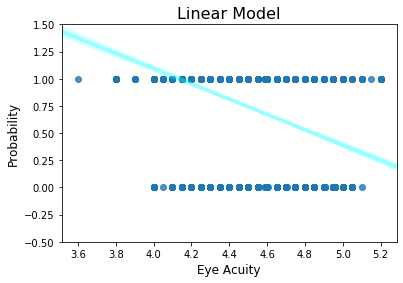

In [14]:
# we plot the graph with a fitted line for acuity and acceptance probability
ax = sns.regplot(x="acuity", y="received", data=df, line_kws={"color":"cyan","alpha":0.3,"lw":4})
plt.ylabel('Probability', fontsize=12)
plt.ylim((-0.5,1.5))
plt.xlabel('Eye Acuity', fontsize=12)
ax.set_title('Linear Model',fontsize=16)

In [15]:
from sklearn.linear_model import LinearRegression
df['acfe'] = df['acuity'] * df['female']
Xf = df[['acuity','female','acfe']]
linmodel = LinearRegression()
linmodel.fit(Xf,df[['received']])
print('coeficients of the model with interaction of female and eye acuity is:', linmodel.coef_)
print('constant term is:', linmodel.intercept_)

coeficients of the model with interaction of female and eye acuity is: [[-0.6829079   0.1353346  -0.03819171]]
constant term is: [3.8328638]


* When we use linear regression we see that probability of accepting or accepting exceeds 0 and 1 on the y-axis, which doesn't make sense (as the probability of something happening can only be between 0 and 1)  and we need to employ the different model to explain our model

---------

#### We'll try to visualize the model based on logistic model.
Logistic function mathematically looks like this: ![alt text](https://magoosh.com/statistics/files/2018/03/Peq2-300x102.jpg)

Text(0.5, 1.0, 'Logistic Model')

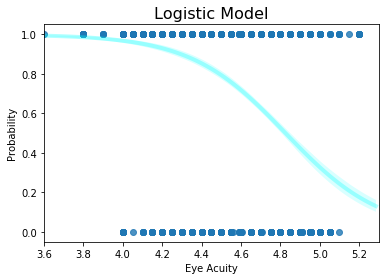

In [16]:
import seaborn as sns
ax = sns.regplot(x=df[['acuity']], y=df[['received']], data=df, logistic=True, line_kws={"color":"cyan","alpha":0.3,"lw":4})
ax.set_ylabel('Probability')
ax.set_xlabel('Eye Acuity')
ax.set_xlim(3.6,5.3)
ax.set_title('Logistic Model',fontsize=16)

* After examining our data visually it seems that <code>Logistic</code> function can fit well in our model as asymptotes of the logistic function are 0 and 1 (which means that whatever the input is, the output gets really close to 0 or 1 but never actually touches it)

---------

#### Now we make the input of other parameters into our model; close to what we used for a linear regression

In [17]:
# we chose the set of explanatory variables close to what we used for our linear regression
Xset = df[['acuity','female','ztest','glasses','teacher','leader']]

In [18]:
# we run the Logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(Xset,df[['received']])
predictions = logmodel.predict(Xset)

print('explanatory variables coeficients are, as follows: ', logmodel.coef_)
print('intercept or constant of the model is:',logmodel.intercept_)

explanatory variables coeficients are, as follows:  [[-2.35578439 -0.15953785 -0.10125446  0.64987177 -0.33930451 -0.45937253]]
intercept or constant of the model is: [11.67654457]


F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Now we see that the probability of accepting glasses is 2.5 higher when a student has good eye acuity.
* 0.16 times less when the student is female
* 0.10 times more if a student scored well on tests
* 0.65 times more if student previously owned glasses
* 0.34 times less if the parent of the student is the teacher
    * This is an interesting finding.
* 0.46 times less if the parent of the student is the village/community leader
    * This is probably because those elected officials care about minor details, which can or may not influence their voters' perception of themselves. Maybe they think that their children having bad eyesight can damage their reputation or somehow deteriorate their position in a community
-------
#### Next, we evaluate the accuracy of our predictions by generating a classification report

In [22]:
#this function will generate confusion matrix needed to evaluate success rate of our logistic model
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(df[['received']], predictions, labels=[1,0]))

[[2018  100]
 [ 752  264]]


Confusion matrix, without normalization
[[2018  100]
 [ 752  264]]


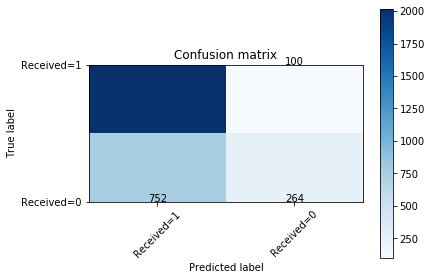

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df[['received']], predictions, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Received=1','Received=0'],normalize= False,  title='Confusion matrix')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(df[['received']], predictions))

              precision    recall  f1-score   support

           0       0.73      0.26      0.38      1016
           1       0.73      0.95      0.83      2118

    accuracy                           0.73      3134
   macro avg       0.73      0.61      0.60      3134
weighted avg       0.73      0.73      0.68      3134



* <code>Accuracy</code> - is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost the same. Therefore, you must look at other parameters to evaluate the performance of your model. For our model, we have got 0.73 which means our model is approx. 73% accurate.


* <code>Precision</code> - is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false-positive rate. We have got 0.73 precision which is good


* <code>Recall</code> is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers are: Of all the studied students that received the glasses, how many did we label? We have got a recall of 0.95 of our positive classifications, which is great.


* <code>F1 score</code> - is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy. In our model weighted average is 0.68 which is substantial to infer goodness of our model


* <code>Support</code> is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process. In our case, we have substantial support for both instances. We have over 3000 observations where 1000+ has returned false and 2100+ true outputs.

----

**Beka Modebadze 2019  [LinkedIn](https://www.linkedin.com/in/bmodebadze/); [Github](https://github.com/bexxmodd)**